In [19]:
import cv2 as cv
import matplotlib.pyplot as plt

import pickle_secure
import numpy as np

ModuleNotFoundError: No module named 'pickle_secure'

In [20]:
src = cv.imread(f"logs_and_pipes/logs-1.jpg")
img = cv.cvtColor(src, cv.COLOR_BGR2RGB)

In [21]:
pickle.dumps(img, key="test")

NameError: name 'pickle_secure' is not defined

In [491]:
def get_image(path: str) -> np.ndarray:
    src = cv.imread(path)
    return cv.cvtColor(src, cv.COLOR_BGR2RGB)


def get_gray_image(img: np.ndarray, is_blur: bool = False):
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    if is_blur:
        gray = cv.blur(gray, (3, 3))
    return gray


def resize_image(img: np.ndarray, width: float, height: float):
    return cv.resize(img, (width, height))

In [492]:
def count_detected_circles(image, detected_circles):
    pipes_count = 0
    detected_circles = np.uint16(np.around(detected_circles))

    if detected_circles is None:
        return 0

    for point in detected_circles[0, :]:
        a, b, r = point[0], point[1], point[2]

        cv.circle(image, (a, b), r, (0, 255, 0), 2)
        cv.circle(image, (a, b), 1, (255, 0, 0), 3)

        pipes_count += 1
    
    return pipes_count


## Первое изображение

На этом изображении в исходном масштабе окружности детектируются крайне плохо, что связано с сжатием по горизонтали, по этому изменим масштаб по ширине для более точной оценки

Total logs:  110


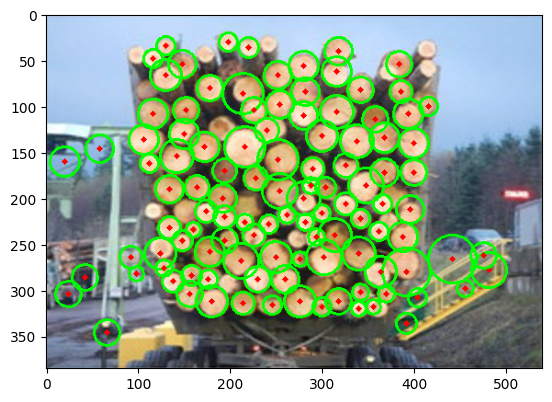

In [493]:
img = get_image(path=f"logs_and_pipes/logs-1.jpg")
height = img.shape[0]
width = img.shape[1] * 2
img = resize_image(img, height=height, width=width)
gray_img = get_gray_image(img=img)

detected_circles = cv.HoughCircles(
    image=gray_img,
    method=cv.HOUGH_GRADIENT,
    dp=1,
    minDist=15,
    param1 = 120,
    param2 = 22,
    minRadius = 0,
    maxRadius = 30
)

image = img.copy()
pipes_count = count_detected_circles(image, detected_circles)

print("Total logs: ", pipes_count)
plt.imshow(image)

С наиболее оптимальными параметрами детектируется 13 лишних окружностей, но зато начинают очень хорошо детектироваться бревна

Total logs:  110


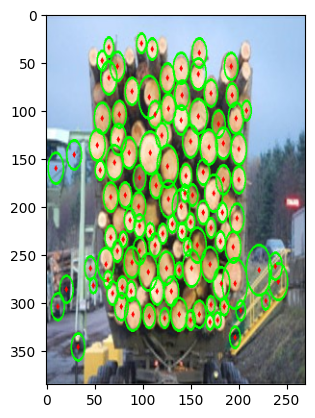

In [267]:
image = resize_image(image, height=height, width=int(width / 2))

print("Total logs: ", pipes_count)
plt.imshow(image)

## Второе изображение

На этом изображении нарушена перспектива, что вытягивает окружности по вертикали. Для того, чтобы иметь возможность определять окружности повлияем на эффект от перспективы уменьшив высоту изображения

Total pipes:  125


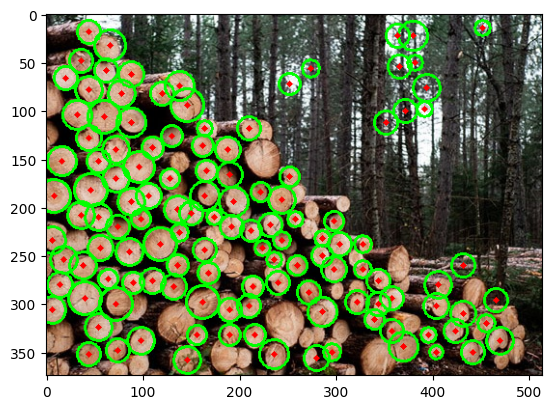

In [494]:
img = get_image(path=f"logs_and_pipes/logs-2.jpg")
gray_img = get_gray_image(img=img)

height = int(img.shape[0] / 1.5)
width = img.shape[1]
img = resize_image(img, height=height, width=width)
gray_img = get_gray_image(img=img)

detected_circles = cv.HoughCircles(
    image=gray_img,
    method=cv.HOUGH_GRADIENT,
    dp=1,
    minDist=15,
    param1 = 400,
    param2 = 15,
    minRadius = 7,
    maxRadius = 18,
)

image = img.copy()
pipes_count = count_detected_circles(image, detected_circles)

print("Total pipes: ", pipes_count)
plt.imshow(image)

С наиболее оптимальными параметрами детектируется 13 лишних окружностей, но зато начинают очень хорошо детектироваться бревна

Total logs:  125


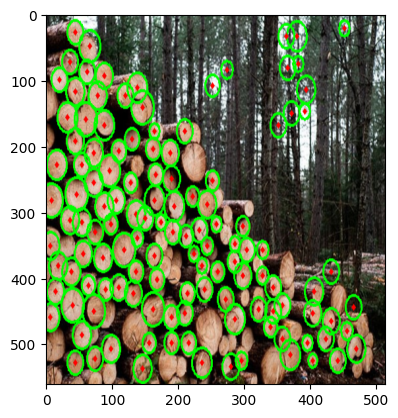

In [495]:
image = resize_image(image, height=int(height * 1.5), width=width)

print("Total logs: ", pipes_count)
plt.imshow(image)

## Третье изображение

Идеальное изображение для поиска окружностей

Total pipes:  78


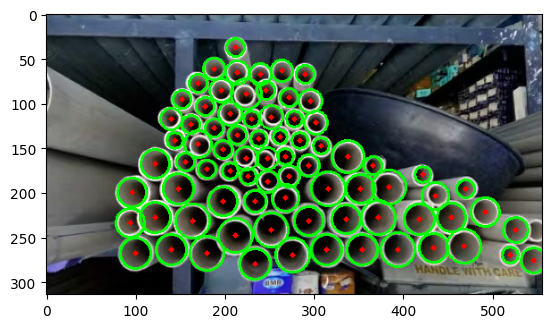

In [444]:
img = get_image(path=f"logs_and_pipes/pipes-4.jpg")
gray_img = get_gray_image(img=img)

detected_circles = cv.HoughCircles(
    image=gray_img,
    method=cv.HOUGH_GRADIENT,
    dp=1,
    minDist=15,
    param1 = 200,
    param2 = 25,
    minRadius = 0,
    maxRadius = 20,
)

image = img.copy()
pipes_count = count_detected_circles(image, detected_circles)

print("Total pipes: ", pipes_count)
plt.imshow(image)

## Четвертое изображение

Total pipes:  157


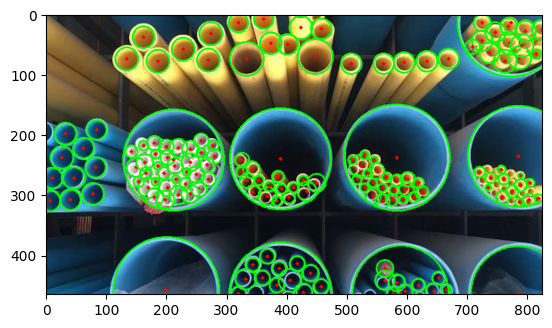

In [448]:
img = get_image(path=f"logs_and_pipes/pipes-5.jpg")
gray_img = get_gray_image(img=img)
circles = []


detected_circles_small = cv.HoughCircles(
    image=gray_img,
    method=cv.HOUGH_GRADIENT,
    dp=1,
    minDist=15,
    param1 = 200,
    param2 = 16,
    minRadius = 0,
    maxRadius = 20,
)

detected_circles_big = cv.HoughCircles(
    image=gray_img,
    method=cv.HOUGH_GRADIENT,
    dp=1,
    minDist=40,
    param1 = 200,
    param2 = 25,
    minRadius = 70,
    maxRadius = 90,
)

detected_circles_middle = cv.HoughCircles(
    image=gray_img,
    method=cv.HOUGH_GRADIENT,
    dp=1,
    minDist=40,
    param1 = 200,
    param2 = 25,
    minRadius = 25,
    maxRadius = 30,
)

image = img.copy()
pipes_count = count_detected_circles(image, detected_circles_small)
pipes_count += count_detected_circles(image, detected_circles_middle)
pipes_count += count_detected_circles(image, detected_circles_big)

print("Total pipes: ", pipes_count)
plt.imshow(image)

## Пятое изображение

Total pipes:  94


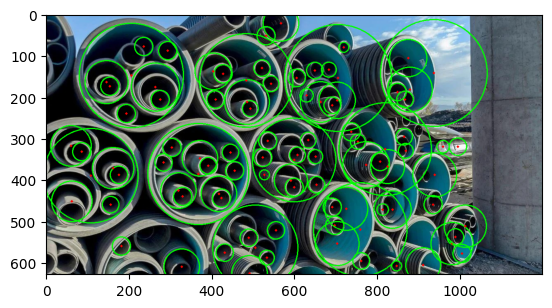

In [489]:
img = get_image(path=f"logs_and_pipes/pipes-6.jpg")
gray_img = get_gray_image(img=img)

circles = []

detected_circles_small = cv.HoughCircles(
    image=gray_img,
    method=cv.HOUGH_GRADIENT,
    dp=1,
    minDist=25,
    param1 = 100,
    param2 = 25,
    minRadius = 10,
    maxRadius = 23,
)

detected_circles_middle = cv.HoughCircles(
    image=gray_img,
    method=cv.HOUGH_GRADIENT,
    dp=1,
    minDist=40,
    param1 = 300,
    param2 = 30,
    minRadius = 40,
    maxRadius = 60,
)

detected_circles_big = cv.HoughCircles(
    image=gray_img,
    method=cv.HOUGH_GRADIENT,
    dp=1,
    minDist=120,
    param1 = 300,
    param2 = 45,
    minRadius = 90,
    maxRadius = 130,
)

image = img.copy()
pipes_count = count_detected_circles(image, detected_circles_small)
pipes_count += count_detected_circles(image, detected_circles_middle)
pipes_count += count_detected_circles(image, detected_circles_big)

print("Total pipes: ", pipes_count)
plt.imshow(image)